<a href="https://colab.research.google.com/github/isabelarchaves/Projetos_Python/blob/main/Projeto_QuintoAndar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Prático - Maratona Analista de Dados**

## **Etapa 1 - Entendendo o problema** 

* **Problema** - Você foi contratado pela Quinto Andar para ser Analista de Dados. A sua primeira tarefa é analisar um conjunto de dados sobre preço de aluguel casas e responder as seguintes perguntas:

1. Em quais cidades se concentram a maior quantidade de casas?
2. Em quais cidades estão os imóveis com maior preço de aluguel?
3. Ter animais impacta no preço do aluguel?
4. As casas mobiliadas possuem um preço de aluguel mais alto?

## **Etapa 2 - Coletando e conhecendo os dados**

- A equipe realizou a extração dos dados diretamente do Banco e forneceu a você um conjunto de dados no formato Excel contendo variáveis importantes e que podem ser úteis para responder essas perguntas.
    - Cidade que as casas se localizam;
    - Área em metros quadrados da casa
    - Quantidade de quartos;
    - Quantidade de banheiros;
    - Quantidade de vagas de Estacionamento;
    - Andar da casa;
    - Se aceita animais;
    - Preço da taxa de condomínio;
    - Preço do aluguel;
    - Preço da Taxa de IPTU;
    - Preço da Taxa de Incêndio;
    - Preço total do aluguel.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style='ticks')

In [4]:
df = pd.read_excel('casas_para_aluguel.xlsx')

In [5]:
df.head()

,cidade,area,quartos,banheiros,vagas_estacionamento,andar,animal,mobiliado,taxa_condominio,preco_aluguel,taxa_iptu,taxa_incendio,total_aluguel
0,São Paulo,70.0,2.0,1.0,1.0,7,sim,sim,2065.0,3300.0,211.0,42.0,5618.0
1,São Paulo,320.0,4.0,4.0,0.0,20,sim,nao,1200.0,4960.0,1750.0,63.0,7973.0
2,Porto Alegre,80.0,1.0,1.0,1.0,6,sim,nao,1000.0,2800.0,0.0,41.0,3841.0
3,Porto Alegre,51.0,2.0,1.0,0.0,2,sim,nao,270.0,1112.0,22.0,17.0,1421.0
4,São Paulo,25.0,1.0,1.0,0.0,1,nao,nao,0.0,800.0,25.0,11.0,836.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cidade                10692 non-null  object 
 1   area                  10692 non-null  float64
 2   quartos               10692 non-null  float64
 3   banheiros             10692 non-null  float64
 4   vagas_estacionamento  10692 non-null  float64
 5   andar                 10692 non-null  object 
 6   animal                10692 non-null  object 
 7   mobiliado             10692 non-null  object 
 8   taxa_condominio       10692 non-null  float64
 9   preco_aluguel         10692 non-null  float64
 10  taxa_iptu             10692 non-null  float64
 11  taxa_incendio         10692 non-null  float64
 12  total_aluguel         10692 non-null  float64
dtypes: float64(9), object(4)
memory usage: 1.1+ MB


O documento possui 10692 registros de imóveis e 13 colunas

In [8]:
df.describe().round(2)

,area,quartos,banheiros,vagas_estacionamento,taxa_condominio,preco_aluguel,taxa_iptu,taxa_incendio,total_aluguel
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,149.22,2.51,2.24,1.61,1174.02,3896.25,366.70,53.30,5490.49
std,537.02,1.17,1.41,1.59,15592.31,3408.55,3107.83,47.77,16484.73
min,11.00,1.00,1.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,56.00,2.00,1.00,0.00,170.00,1530.00,38.00,21.00,2061.75
50%,90.00,2.00,2.00,1.00,560.00,2661.00,125.00,36.00,3581.50
75%,182.00,3.00,3.00,2.00,1237.50,5000.00,375.00,68.00,6768.00
max,46335.00,13.00,10.00,12.00,1117000.00,45000.00,313700.00,677.00,1120000.00


## **Etapa 3 - Análise Exploratória dos Dados**

### 1. Em quais cidades se concentram a maior quantidade de casas?



In [11]:
# Preciso saber a quantidade de vezes que cada cidade aparece na tabela

df['cidade'].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: cidade, dtype: int64

In [16]:
df['cidade'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


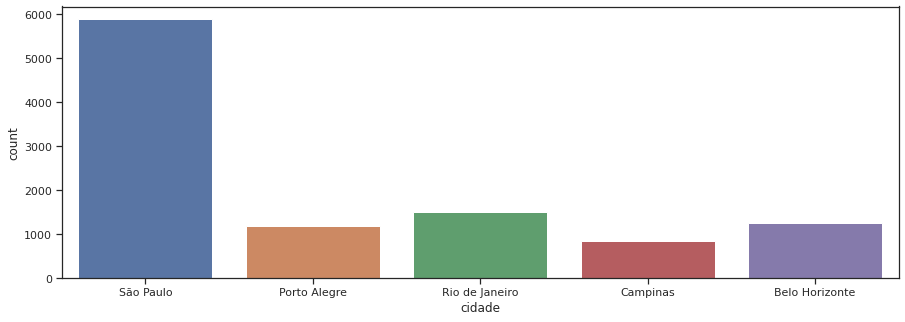

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(df['cidade'])
plt.show()

Resposta questão 1: São Paulo concentra a maior quantidade de casas

### 2. Em quais cidades estão os imóveis com maior preço de aluguel?

In [18]:
df.head()

,cidade,area,quartos,banheiros,vagas_estacionamento,andar,animal,mobiliado,taxa_condominio,preco_aluguel,taxa_iptu,taxa_incendio,total_aluguel
0,São Paulo,70.0,2.0,1.0,1.0,7,sim,sim,2065.0,3300.0,211.0,42.0,5618.0
1,São Paulo,320.0,4.0,4.0,0.0,20,sim,nao,1200.0,4960.0,1750.0,63.0,7973.0
2,Porto Alegre,80.0,1.0,1.0,1.0,6,sim,nao,1000.0,2800.0,0.0,41.0,3841.0
3,Porto Alegre,51.0,2.0,1.0,0.0,2,sim,nao,270.0,1112.0,22.0,17.0,1421.0
4,São Paulo,25.0,1.0,1.0,0.0,1,nao,nao,0.0,800.0,25.0,11.0,836.0


In [26]:
media_aluguel = df.groupby("cidade")['total_aluguel'].mean()
media_aluguel

cidade
Belo Horizonte    6315.242448
Campinas          3173.276671
Porto Alegre      2989.782900
Rio de Janeiro    4611.684877
São Paulo         6380.831833
Name: total_aluguel, dtype: float64

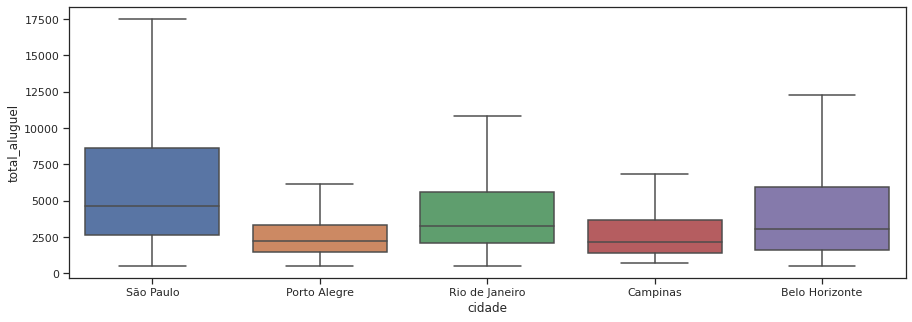

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(x='cidade', y='total_aluguel', data=df, showfliers=False)
plt.show()

Resposta questão 2: São Paulo tem os alugueis mais altos

### 3. Ter animais impacta no preço do aluguel?

In [30]:
df.head()

,cidade,area,quartos,banheiros,vagas_estacionamento,andar,animal,mobiliado,taxa_condominio,preco_aluguel,taxa_iptu,taxa_incendio,total_aluguel
0,São Paulo,70.0,2.0,1.0,1.0,7,sim,sim,2065.0,3300.0,211.0,42.0,5618.0
1,São Paulo,320.0,4.0,4.0,0.0,20,sim,nao,1200.0,4960.0,1750.0,63.0,7973.0
2,Porto Alegre,80.0,1.0,1.0,1.0,6,sim,nao,1000.0,2800.0,0.0,41.0,3841.0
3,Porto Alegre,51.0,2.0,1.0,0.0,2,sim,nao,270.0,1112.0,22.0,17.0,1421.0
4,São Paulo,25.0,1.0,1.0,0.0,1,nao,nao,0.0,800.0,25.0,11.0,836.0


In [31]:
df['animal'].value_counts()

sim    8316
nao    2376
Name: animal, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


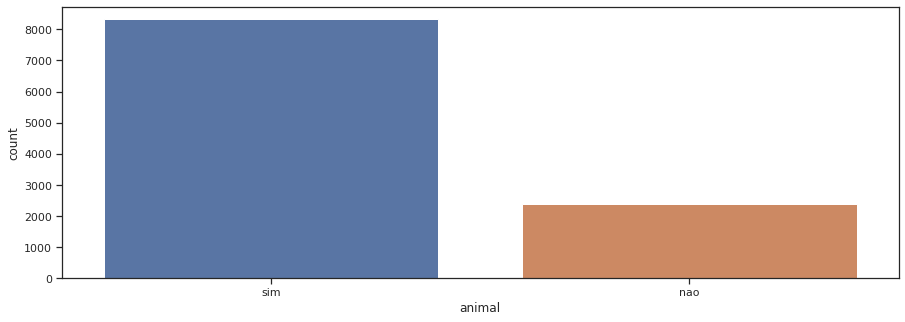

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(df['animal'])
plt.show()

In [33]:
df.groupby('animal')['total_aluguel'].mean()

animal
nao    5710.761364
sim    5427.551467
Name: total_aluguel, dtype: float64

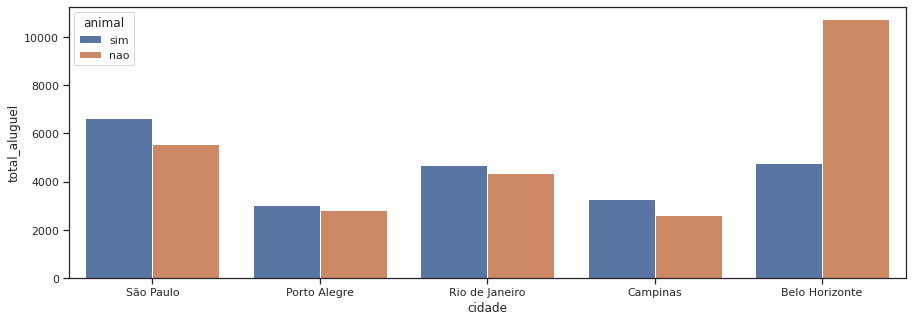

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['cidade'] , y=df['total_aluguel'], hue=df['animal'], ci=False, estimator=np.mean)

Resposta questão 3: As casas com animais não são mais caras

### 4. As casas mobiliadas possuem um preço de aluguel mais alto?

In [38]:
df.head()

,cidade,area,quartos,banheiros,vagas_estacionamento,andar,animal,mobiliado,taxa_condominio,preco_aluguel,taxa_iptu,taxa_incendio,total_aluguel
0,São Paulo,70.0,2.0,1.0,1.0,7,sim,sim,2065.0,3300.0,211.0,42.0,5618.0
1,São Paulo,320.0,4.0,4.0,0.0,20,sim,nao,1200.0,4960.0,1750.0,63.0,7973.0
2,Porto Alegre,80.0,1.0,1.0,1.0,6,sim,nao,1000.0,2800.0,0.0,41.0,3841.0
3,Porto Alegre,51.0,2.0,1.0,0.0,2,sim,nao,270.0,1112.0,22.0,17.0,1421.0
4,São Paulo,25.0,1.0,1.0,0.0,1,nao,nao,0.0,800.0,25.0,11.0,836.0


In [39]:
df['mobiliado'].value_counts()

nao    8086
sim    2606
Name: mobiliado, dtype: int64

In [41]:
df.groupby('mobiliado')['total_aluguel'].mean().round(2)

mobiliado
nao    5136.93
sim    6587.51
Name: total_aluguel, dtype: float64

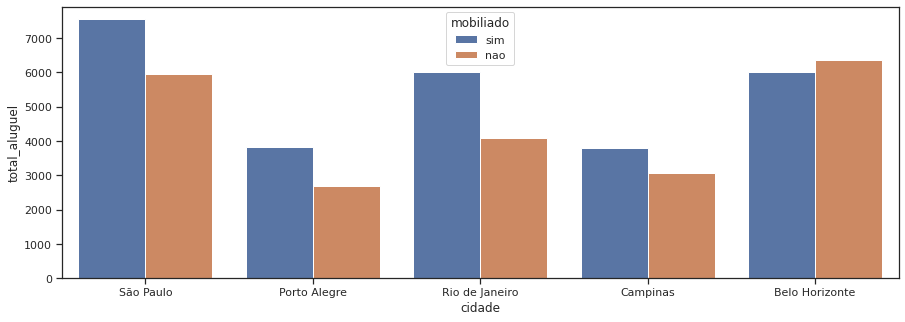

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['cidade'] , y=df['total_aluguel'], hue=df['mobiliado'], ci=False, estimator=np.mean)

## **Etapa 4: Apresentação**

Em quais cidades se concentram a maior quantidade de casas?

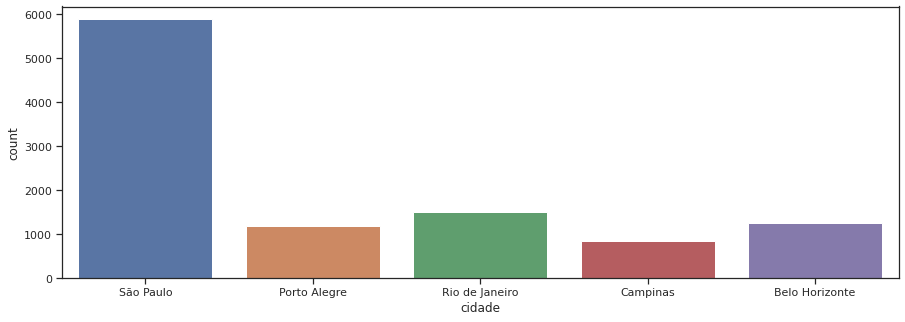

Em quais cidades estão os imóveis com maior preço de aluguel?

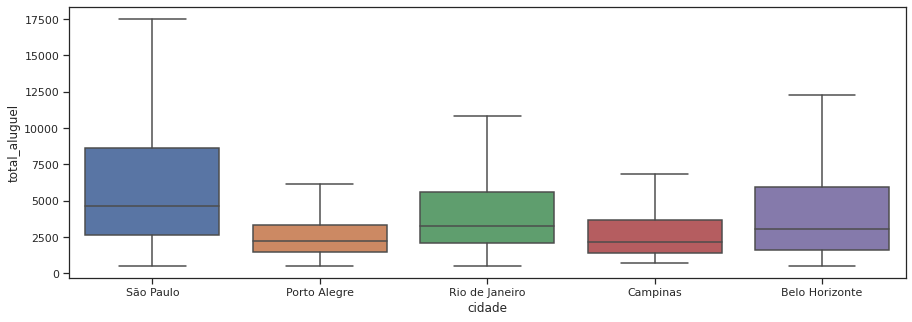

Ter animais impacta no preço do aluguel?

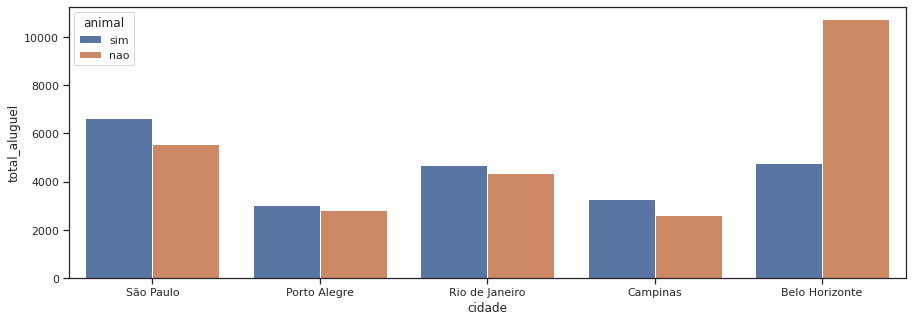

As casas mobiliadas possuem um preço de aluguel mais alto?

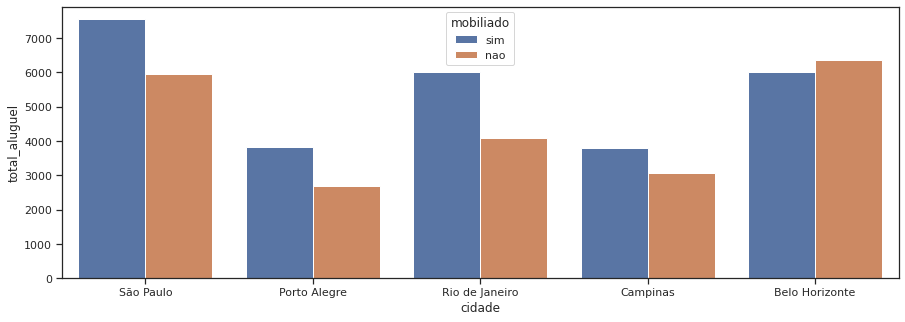